RFM Analysis on Hotel Customer Segmentation

Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
df=pd.read_excel("C:/Users/ahmed/OneDrive/Desktop/Data/HotelCustomersDataset.xlsx")
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df.shape

(83590, 31)

In [57]:
df.isna().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [58]:
columns_to_keep = ['ID', 'LodgingRevenue','OtherRevenue','BookingsCheckedIn','DaysSinceLastStay']
df = df[columns_to_keep]

In [59]:
df.head()

,ID,LodgingRevenue,OtherRevenue,BookingsCheckedIn,DaysSinceLastStay
0,1,371.0,105.3,3,151
1,2,280.0,53.0,1,1100
2,3,0.0,0.0,0,-1
3,4,240.0,60.0,1,1100
4,5,0.0,0.0,0,-1


In [60]:
df = df[df["DaysSinceLastStay"] != -1]

In [61]:
df.head()

,ID,LodgingRevenue,OtherRevenue,BookingsCheckedIn,DaysSinceLastStay
0,1,371.0,105.3,3,151
1,2,280.0,53.0,1,1100
3,4,240.0,60.0,1,1100
5,6,230.0,24.0,1,1097
7,8,535.0,94.0,1,1100


In [62]:
df['TotalRevenue']=df['LodgingRevenue']+df['OtherRevenue']

In [63]:
columns_to_keep = ['ID','TotalRevenue','BookingsCheckedIn','DaysSinceLastStay']
df = df[columns_to_keep]

In [64]:
df.head()

,ID,TotalRevenue,BookingsCheckedIn,DaysSinceLastStay
0,1,476.3,3,151
1,2,333.0,1,1100
3,4,300.0,1,1100
5,6,254.0,1,1097
7,8,629.0,1,1100


In [65]:
df = df.rename(columns={
    'TotalRevenue': 'Monetary',
    'BookingsCheckedIn': 'Frequency',
    'DaysSinceLastStay':'Recency'
})
df.head()

,ID,Monetary,Frequency,Recency
0,1,476.3,3,151
1,2,333.0,1,1100
3,4,300.0,1,1100
5,6,254.0,1,1097
7,8,629.0,1,1100


We have not to make grouping because ids is unique

In [110]:
df=df[df['Monetary']>0]
df

,ID,Monetary,Frequency,Recency,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,1,476.3,3,151,1,1,2,412,Promising
1,2,333.0,1,1100,4,4,3,143,At Risk
3,4,300.0,1,1100,4,4,3,143,At Risk
5,6,254.0,1,1097,4,4,3,143,At Risk
7,8,629.0,1,1100,4,4,1,141,At Risk
...,...,...,...,...,...,...,...,...,...
83580,83581,323.0,1,2,1,1,3,413,Promising
83582,83583,145.0,1,1,1,1,4,414,Promising
83584,83585,442.4,1,4,1,1,2,412,Promising
83586,83587,604.6,1,3,1,1,1,411,Promising


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,63385.0,35976.908196,22878.512242,1.0,16977.0,32892.00,53083.0,83589.0
Monetary,63385.0,483.184381,450.899246,1.0,237.0,378.31,579.6,23365.0
Frequency,63385.0,1.042723,0.613136,1.0,1.0,1.00,1.0,66.0
Recency,63385.0,527.119303,302.900684,0.0,255.0,528.00,799.0,1104.0


In [115]:
df['recency_score'] = pd.qcut(df['Recency'], 4, ['1','2','3','4'])
df['frequency_score'] = pd.qcut(df['Frequency'].rank(method="first"), 4, ['4','3','2','1'])
df['monetary_score'] = pd.qcut(df['Monetary'], 4, ['4','3','2','1'])
df.head()

,ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,1,151,3,476.3,1,1,2
1,2,1100,1,333.0,4,4,3
3,4,1100,1,300.0,4,4,3
5,6,1097,1,254.0,4,4,3
7,8,1100,1,629.0,4,4,1


In [116]:
df

,ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,1,151,3,476.3,1,1,2
1,2,1100,1,333.0,4,4,3
3,4,1100,1,300.0,4,4,3
5,6,1097,1,254.0,4,4,3
7,8,1100,1,629.0,4,4,1
...,...,...,...,...,...,...,...
83580,83581,2,1,323.0,1,1,3
83582,83583,1,1,145.0,1,1,4
83584,83585,4,1,442.4,1,1,2
83586,83587,3,1,604.6,1,1,1


In [117]:
df["RFM_SCORE"]=df.recency_score.astype(str)+df.frequency_score.astype(str)+df.monetary_score.astype(str)

In [118]:
df

,ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,1,151,3,476.3,1,1,2,112
1,2,1100,1,333.0,4,4,3,443
3,4,1100,1,300.0,4,4,3,443
5,6,1097,1,254.0,4,4,3,443
7,8,1100,1,629.0,4,4,1,441
...,...,...,...,...,...,...,...,...
83580,83581,2,1,323.0,1,1,3,113
83582,83583,1,1,145.0,1,1,4,114
83584,83585,4,1,442.4,1,1,2,112
83586,83587,3,1,604.6,1,1,1,111


In [119]:
def get_segment(rfm_score):
    r, f, m = int(rfm_score[0]), int(rfm_score[1]), int(rfm_score[2])
    
    if (r, f) in [(1, 1), (1, 2), (2, 1), (2, 2)]:
        return 'Hibernating'
    elif (r, f) in [(1, 3), (1, 4), (2, 3), (2, 4)]:
        return 'At Risk'
    elif (r in [1, 2]) and m == 4:
        return 'Cannot Lose'
    elif (r == 3) and (f in [1, 2]):
        return 'About to Sleep'
    elif (r == 3) and (f == 3):
        return 'Need Attention'
    elif (r in [3, 4]) and (f in [4]) and (m == 4):
        return 'Loyal Customers'
    elif (r == 4) and (f == 1):
        return 'Promising'
    elif (r == 4) and (f == 2):
        return 'New Customers'
    elif (r in [4]) and (m in [2, 3]):
        return 'Potential Loyalists'
    elif (r == 4) and (f in [3, 4]):
        return 'Champions'
    else:
        return 'Undefined'

df['segment'] = df['RFM_SCORE'].apply(get_segment)

df.head()


,ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,1,151,3,476.3,1,1,2,112,Hibernating
1,2,1100,1,333.0,4,4,3,443,Potential Loyalists
3,4,1100,1,300.0,4,4,3,443,Potential Loyalists
5,6,1097,1,254.0,4,4,3,443,Potential Loyalists
7,8,1100,1,629.0,4,4,1,441,Champions


In [120]:
df[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count","max"]).round()

Recency              Frequency            Monetary         \
                       mean  count   max      mean  count max     mean  count   
segment                                                                         
About to Sleep        654.0    252   795       2.0    252  29    808.0    252   
At Risk               525.0    423   528       1.0    423   1    480.0    423   
Champions             905.0   3134  1104       1.0   3134   1    954.0   3134   
Hibernating           263.0  31301   526       1.0  31301  66    529.0  31301   
Loyal Customers       935.0   5032  1099       1.0   5032   1    156.0   5032   
Need Attention        651.0  15409   799       1.0  15409   1    448.0  15409   
Potential Loyalists   923.0   7575  1102       1.0   7575   1    376.0   7575   
Promising             909.0    139  1075       2.0    139   7    554.0    139   
Undefined             798.0    120   799       1.0    120   1    399.0    120   

                              
                         max  
segment                       
About to Sleep       23365.0  
At Risk               5044.0  
Champions             4996.0  
Hibernating          11931.0  
Loyal Customers        237.0  
Need Attention       10982.0  
Potential Loyalists    580.0  
Promising             2337.0  
Undefined             1621.0

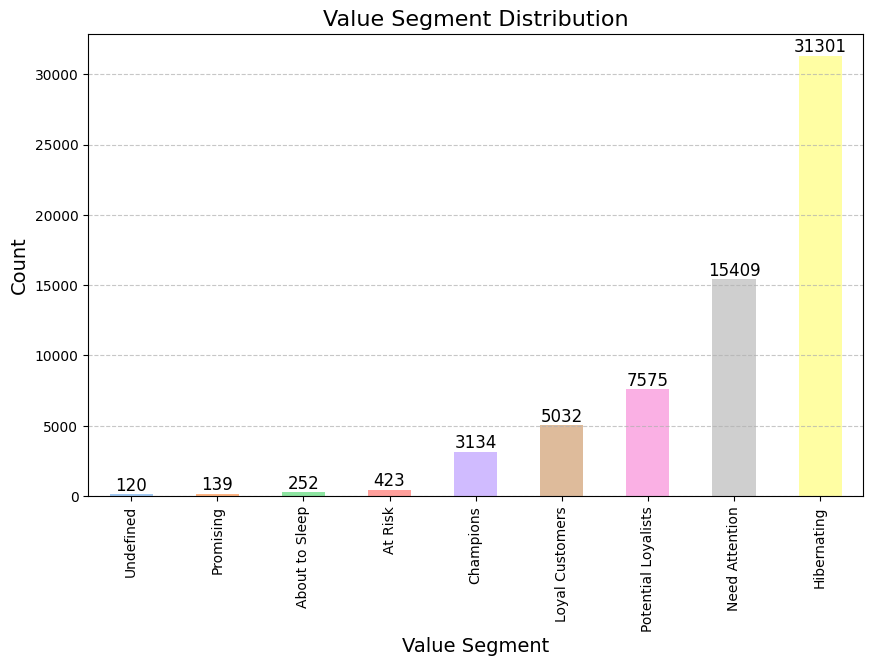

In [121]:
plt.figure(figsize=(10, 6))
ax = df['segment'].value_counts().sort_values().plot(kind='bar', color=sns.color_palette("pastel"))
ax.set_title('Value Segment Distribution', fontsize=16) 
ax.set_xlabel('Value Segment', fontsize=14)

ax.set_ylabel('Count', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7) 

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='bottom', fontsize=12)

plt.show()

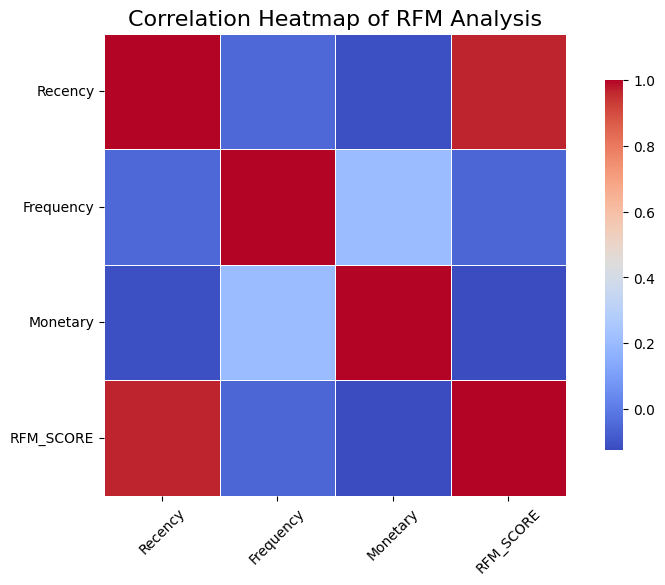

In [122]:
columns_to_plot = ['Recency', 'Frequency', 'Monetary', 'RFM_SCORE']
correlation_matrix = df[columns_to_plot].corr()

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": .8}) 

plt.title('Correlation Heatmap of RFM Analysis', fontsize=16)
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 

plt.show()

In [125]:
segment_scores = df.groupby('segment')[['Recency', 'Frequency','Monetary']].mean().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(
    x=segment_scores['segment'],
    y=segment_scores['Recency'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))
fig.add_trace(go.Bar(
    x=segment_scores['segment'],
    y=segment_scores['Frequency'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))
fig.add_trace(go.Bar(
    x=segment_scores['segment'],
    y=segment_scores['Monetary'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)
fig.show()